# The Python numpy.random package <a class="ancor" id="top"/>

## Table of Contents <a class="ancor" id="toc"/>

1. [The Purpose of the numpy.random package](#purpose-of-random)
1. [The Use of Random data](#use-of-random)
1. [The Use of Permutations](#use-of-permutations)
1. [The Use of Distributions](#use-of-dist)
 1. [Laplace](#dist-laplace)
 1. [Binomial](#dist-binomial)
 1. [Exponential](#dist-exponential)
 1. [Log](#dist-log)
 1. [Student-t](#dist-student-t)
 1. [Zipf](#dist-zipf)
1. [The Use of Seeds](#use-of-seeds)
1. [Lessons Learned](#lessons-learned)
1. [References](#reference-list)

## The Purpose of the numpy.random package <a class="ancor" id="purpose-of-random"/>

The purpose of a random number generator is to generate a number or sequence of numbers that cannot be reasonably predicted better than that by random chance. 

Random number generators have applications in gambling, statistical sampling, computer simulations, cryptography and randomised experimental design.

The earliest methods of random number generators were dice, spinners, wheel of fortune, roulette, etc., cards, drawing straws, tea leaves, flipping coins, pulling from a set of items in a bag, hat, etc.

The general purpose of the numpy.random package is to generate various types and distributions of datasets that can be used in development and evaluation and used in the exploration of various libraries and analytical methods. It provides the developer with a clear understanding of the dataset prior to analysis, to explore analytical methods and derive the very variables initially used to create a dataset and deduce them again from the dataset using analyses and analytical methods and libraries. 

[Back](#top)

 ## The Use of Simple Random data <a class="ancor" id="use-of-random"/>

The sample random data functions generate sequences of random numbers without considering any criteria, like distribution. 

Permutations acts upon a dataset in one of two fashions, it shuffles the dataset by acting upon it directly or by creating a shuffled copy of the set using the permutation function.

One practical real world use case would be that of simulating the roll of a six sided dice thousands of times as illustrated below.

In [1]:
import numpy.random as rnd
import matplotlib.pyplot as pl
import seaborn as sns
%matplotlib inline

def diceroll ():
    import numpy.random as rnd
    dice=['one','two','three','four','five','six']
    return rnd.choice(dice)


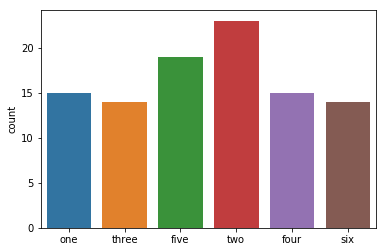

In [2]:
dicerolls=[diceroll() for i in range(100)]
sns.countplot(dicerolls)
pl.show()

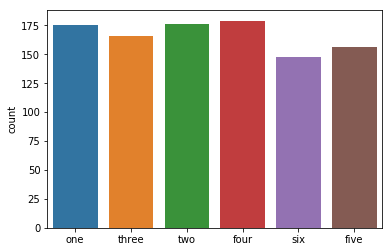

In [3]:
dicerolls=[diceroll() for i in range(1000)]
sns.countplot(dicerolls)
pl.show()

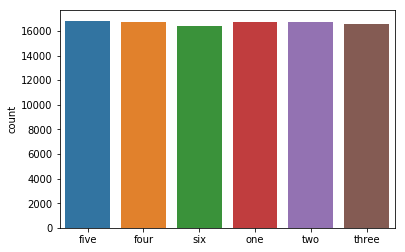

In [4]:
dicerolls=[diceroll() for i in range(100000)]
sns.countplot(dicerolls)
pl.show()

The numpy.random.choice function is used to randomly select one of the six sides of the dice and then to run this process through thousands of cycles to test the distribution for the randomness of the function.

The really interesting observation of a very simple experiment like this immediately shows the impact of the statistical sample and the corresponding differences in the distributions. With really big test samples the statistical differences becomes negligible. 

[Back](#top)

## The use of Permutations <a class="ancor" id="use-of-permutations"/>

Permutations can be illustrated on the dice object illustrated in the exercise above.

In [5]:
dice=['one','two','three','four','five','six']
dice

['one', 'two', 'three', 'four', 'five', 'six']

The dice object appears in the fixed sequence it was created in previously.

In [6]:
rnd.permutation(dice)

array(['six', 'five', 'one', 'two', 'four', 'three'], dtype='<U5')

In [8]:
dice

['three', 'four', 'five', 'six', 'two', 'one']

So the permutation of dice create a new permuted sequence, but the original object dice remains intact.

Now we run shuffle on the same object dice.

In [7]:
 rnd.shuffle(dice)
 print(dice)

['three', 'four', 'five', 'six', 'two', 'one']


Now the dice object content was permanently shuffled to be in a new random order.

[Back](#top)

## The use of distributions <a class="ancor" id="use-of-dist"/>

### Laplace Distribution <a class="ancor" id="dist-laplace"/>

<img style="float: left; margin: 0px 15px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/9/91/Pierre-Simon-Laplace_%281749-1827%29.jpg" alt="Piere Laplace" title="Piere Laplace" />The Laplace distribution was named after Pierre-Simon Laplace who was a prominent French mathematical physicist and astronomer of the 19th century, who made crucial contributions in the arena of planetary motion by applying Sir Isaac Newton’s theory of gravitation to the entire solar system. His work regarding the theory of probability and statistics is considered pioneering and has influenced a whole new generation of mathematicians.

The Laplace distribution is similar to the Gaussian/normal distribution, but is sharper at the peak and has fatter tails. It represents the difference between two independent, identically distributed exponential random variables.

The normal distribution sometimes also referred to as the Gaussian distribution recognisable by the distinctive bell shape. A distinguishing feature of the Laplace distribution is its tails, which are fatter than the normal distribution’s. 

The Laplace distribution (given after the name of Pierre-Laplace) is a distribution which again like the t-distribution can be used for robustness to outliers due to fatter tails. It is also called double exponential distribution due to being made up from 2 exponential functions. What is interesting about it is that it is quite similar to the Gaussian. Instead of mean (μ) and standard deviation (σ), Laplace has location (also μ) and diversity (b).


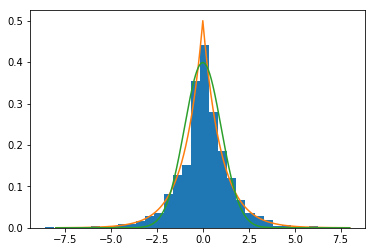

In [10]:
import numpy.random as rnd
import matplotlib.pyplot as pl
import numpy as np
%matplotlib inline

loc, scale = 0., 1. # set location and diversity
s = rnd.laplace(loc, scale, 1000) # generate a random set 
count, bins, ignored = pl.hist(s, 30, density=True)

x = np.arange(-8., 8., .01) # creat a list of x values
pdf = np.exp(-abs(x-loc)/scale)/(2.*scale) #pdf - probability density function
pl.plot(x, pdf)
#gausian for comparisom in green
g = (1/(scale * np.sqrt(2 * np.pi)) *np.exp(-(x - loc)**2 / (2 * scale**2)))
pl.plot(x,g)
#pl.show()

[Back](#top)

### Binomial Distribution <a class="ancor" id="dist-binomial"/>

Selecting a binomial for distribution for discussion was supposed to be easy, however the library function outputs required some more code to convert the outputs into data values useful in a plot. Also tweaking the parameters is not that trivial to produce a very binomial looking dataset, it more closely resembles a normal or Gaussian distribution until a sufficiently big dataset was produced to shift everything to the left.

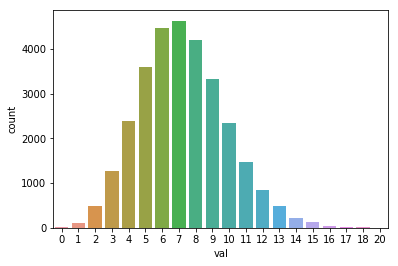

In [9]:
import collections                         # for counting the 30k cycle results 
import matplotlib.pyplot as pl
import numpy.random as rnd
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

a=np.random.binomial(99, 0.073, 30000)     # generate a binomial distribution with a 7.3% probability over 99 tests
b=collections.Counter(a)                   # count the number of occurances of the values generated in a over 30k cycles
c=b.most_common()                          # sort by most common and create a list for use in graph
df=pd.DataFrame(c,columns=['val','count']) # convet the list to a dataframe for ease of use with seaborn with labels etc
sns.barplot('val','count',data=df)         # generate the plot
pl.show()

Having being forced in a way to work through the logic of generating the plot and generating appropriate data to do so, resulted in a deeper understanding of the fundamentals behind the graph and graph data by playing around with the random.binomial parameters.

rnd.binomial(n, p, size=None)


n - trials 

p - probability

size - size of set 

[Back](#top)

### Exponential Distribution <a class="ancor" id="dist-exponential"/>

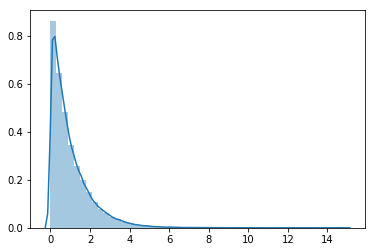

In [11]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
%matplotlib inline

e=np.random.exponential(1,100000)
sns.distplot(e)

[Back](#top)

### Log Distribution <a class="ancor" id="dist-log"/>

Again the expectation was to generate a dataset using the __np.randowm.lognormal__ function and and simply plot the data output.

When generating a bunch of numbers and sorting them by size it follows a logarithmic curve one would expect to get but getting a log distribution graph, resembling what is shown in the literature, takes a very different approach even in the python random log distribution documentation discussion.

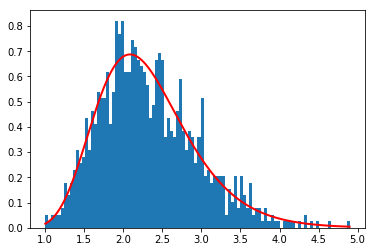

In [12]:
# Generate a thousand samples: each is the product of 100 random
# values, drawn from a normal distribution.

import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
%matplotlib inline

b = []
for i in range(1000): # generate a set of 1000 really big random numbers 1.0475083199045841e+102
    a = 10. + np.random.random(100)
    b.append(np.product(a))

b = np.array(b) / np.min(b) # scale values to range 0-2 roughly, so bigger than 0 and smaller than 2
count, bins, ignored = pl.hist(b, 100, density=True, align='mid') # create a histogram plot and save the conts and bins values
sigma = np.std(np.log(b)) # generate the log values of the array b and then calculate the standard deviation of the set
mu = np.mean(np.log(b)) # generate the log mean of the set

x = np.linspace(min(bins), max(bins), 10000) # generate evenly spaced number for the x-axis of the graph
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)) # calculate the probability density function
        / (x * sigma * np.sqrt(2 * np.pi)))

pl.plot(x, pdf, color='r', linewidth=2) # plot the pdf in red over the histogram
pl.show()

[Back](#top)

### Student-t Distribution <a class="ancor" id="dist-student-t"/>

The distinguishing feature of the t-distribution are its tails, which are fatter than the normal distribution’s. If the fat-tail reference does'nt get your attention then maybe the mildly-interesting back-story concerning beer might get your attention. 

Over 100 years ago, Guinness was using statistics to make better stout. There, William Sealy Gosset developed some whole new stats theory just to grow better barley. Gosset convinced the boss that the other brewers couldn’t figure out how to use the ideas, and so got permission to publish, but only under the pen name “Student”. Gosset’s best-known result is this t-distribution, which is sort of named after him. 
 
It is like the Gaussian distribution. Easy to remember - think 't'  for fatter tails; a Gaussian with fatter tails. It is a probability  distribution that is used to estimate population parameters when the  sample size is small and/or when the population variance is unknown.  Plus, it keeps outliers in mind too. Thereby, is more robust than the  Gaussian distribution. The t-distribution's properties start to resemble  the Gaussian when the degrees of freedom are high.

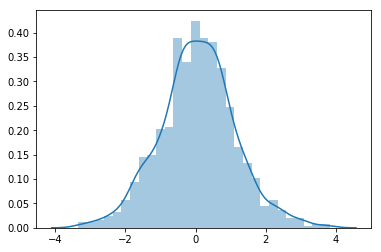

In [13]:
import matplotlib.pyplot as pl
import numpy.random as rnd
import seaborn as sns
%matplotlib inline

t=rnd.standard_t(10,1000)
sns.distplot(t)

[Back](#top)

### Zipf Distribution <a class="ancor" id="dist-zipf"/>

<img style="float: left; margin: 0px 15px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/c/c6/George_Kingsley_Zipf_1917.jpg" alt="George Kingsley Zipf" title="George Kingsley Zipf" />The last distribution and probably the most interesting one for me, is the Zipf distribution.

My personal fascination with Zipf was from before my exposure to data analytics when I first heard about the the applicability of the  distribution on popularity of things like the most popular video on Youtube or the distribution of wealth to name a few applicable examples. So in order to factor on any scale of life on a personal level, it is a simple question of getting involved and becoming part of the statistics or sit on the side and not be counted at all. The same analogy can be applied for example to a snowball rolling down the hill exponentially growing, so the most popular video on Youtube was once a tiny snowball that had to pick up the momentum to be twice as large as the next biggest success. 

Zipf's law states that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc.: the rank-frequency distribution is an inverse relation. For example, in the Brown Corpus of American English text, the word __the__ is the most frequently occurring word, and by itself accounts for nearly 7% of all word occurrences (69,971 out of slightly over 1 million). True to Zipf's Law, the second-place word __of__ accounts for slightly over 3.5% of words (36,411 occurrences), followed by __and__ (28,852). Only 135 vocabulary items are needed to account for half the Brown Corpus.

So instead of starting by generating random data, I wanted to explore a more interesting approach by generating a Zipf dataset from a book and test the result from first principle. To simplify the process I looked for a book is text source and stumbled upon __[Ulyses by the James Joyce](data/ulyses_by_james_joyce.txt)__  by James Joyce. So started the process to extract the statistics from first principle and compare the dataset with the law defined by Zipf.

#### Generating a wordlist

So the text from the book is read into a word list line by line, parsed into individual words and stripped of all spaces, punctuation and case.

In [2]:
import seaborn as sns
from collections import Counter as counter
import matplotlib.pyplot as pl
import pandas as pd
%matplotlib inline

In [3]:
wordlist=[]
with open('data/ulyses_by_james_joyce.txt', 'r', encoding='utf-8') as infile:
    for line in infile:
        words=line.strip().split()
        for word in words:
            wordlist.append(word.casefold().strip('[,:.]'))

In [16]:
print('Words in book: {:,}'.format(len(wordlist)))

Words in book: 268,132


The resulting word list of almost 270 thousand is then counted by word usage and a complete list of counted word generated for the entire book.

In [14]:
wordcount=counter(wordlist)
print('Unique words in book: {:,}'.format(len(wordcount)))

Unique words in book: 34,986


The result is almost 35 thousand unique words that is then sorted by the most frequent occurrence and arranged in a data frame for display and graphing purposes.

In [10]:
most_common=wordcount.most_common()

The most common word and count of the words are then assembled in a data frame __df__.

#### Creating tables and plots

In [6]:
words=[];counts=[]

for word,count in most_common:
    words.append(word); counts.append(count)
df=pd.DataFrame({'words': words,'counts': counts});df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
words,the,of,and,a,to,in,he,his,i,that,with,it,was,on,for
counts,14888,8244,7198,6442,4983,4887,3752,3292,2527,2523,2506,2246,2117,2105,1928


So true to Zipfs findings the three top words are __the__, __of__ and __and__. The percentages in Ziphs findings are substantially(about 6 times) higher, but can be explained by the much smaller size of the dataset used here, i.e. 30 thousand vs one million. 

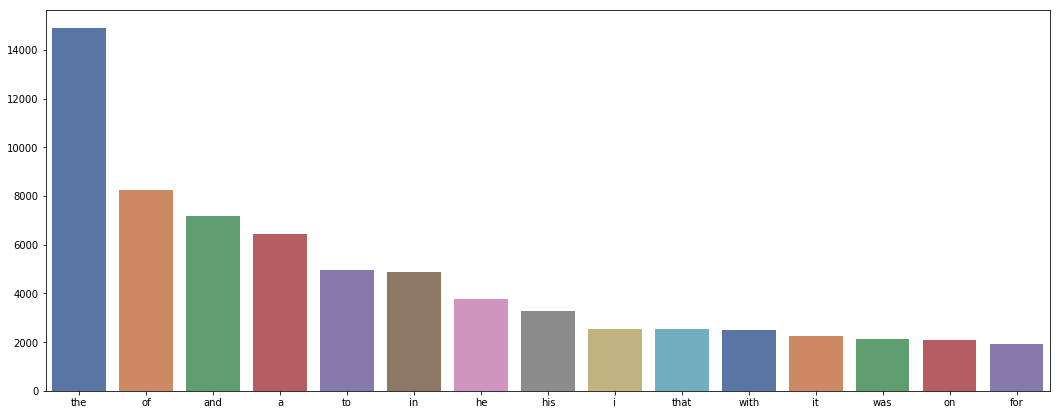

In [21]:
pl_size = (18, 7) # set the graph size
fig, ax = pl.subplots(figsize=pl_size)
sns.barplot(ax=ax,x=words,y=counts, palette="deep", data=df)
pl.show()

Although not a perfect Ziphian distribution from the third term onward, it follows the pattern of most such distributions typically derived on smaller datasets and compared to the set randomly generated below.

(array([26904.,   911.,   581.,   392.,   271.,   264.,   205.,   175.,
          151.,   146.]),
 array([1.00000000e+00, 2.14417784e+08, 4.28835566e+08, 6.43253348e+08,
        8.57671131e+08, 1.07208891e+09, 1.28650670e+09, 1.50092448e+09,
        1.71534226e+09, 1.92976004e+09, 2.14417783e+09]),
 <a list of 10 Patch objects>)

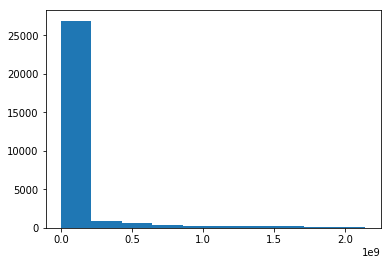

In [22]:
import numpy.random as rnd
import matplotlib.pyplot as pl
%matplotlib inline

z=rnd.zipf(1.0001,30000)
pl.hist(z)

The random generated Zipf distribution makes a huge jump from first place to the second. My simplified expected outcome of the perfect Zipf distribution would simply be a series from 1,1/2,1/3 etc.

The simplified expected results is generated below.

In [23]:
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

sz=[1/i for i in range(1,31)] # 1/1,1/2,1/3 ...

<BarContainer object of 30 artists>

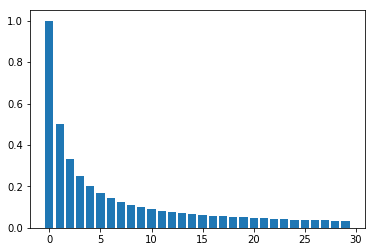

In [24]:
idx=np.arange(len(sz))
pl.bar(idx,sz)

The graph above would be my perfect textbook zipf distribution, at least in my understanding of the literature on the topic.

[Back](#top)

## The use of seeds  <a class="ancor" id="use-of-seeds"/>

Seeds are used to generate repeatable random sequences. The two short pieces of code illustrates the use of the random generator with or without seeds.

In [19]:
import numpy.random as rnd
rnd.seed(89810064)
rnd.random(5)

array([0.82684645, 0.45754801, 0.86121993, 0.92949752, 0.40658202])

The seeded generator will always produce and reproduce the same sequence after the call to seed and using the same seeded value. 

Sp for the specific code and seed above the values will always be [0.82684645, 0.45754801, 0.86121993, 0.92949752, 0.40658202]

In [32]:
import numpy.random as rnd
#rnd.seed(89810064)
rnd.random(5)

array([0.33457736, 0.67335818, 0.18300096, 0.13224331, 0.91449696])

The unseeded random generator will always generate a completely new sequence. 

[Back](#top)

## Lessons learned  <a class="ancor" id="lessons-learned"/>

So really the big takeaway from this exercise in testing distributions is that the penny dropped at last and that the numpy random libraries  generates datasets that needs to be measured for their distributions using a distribution function and can also be overlaid with a distribution trend line. 

There are two ways to test the distribution, in multiple steps as shown in the Laplace and Log distributions or on a single step using the __seaborn.distplot__ function.

The multiple step approach can be summarised as follow:

- Create or load a dataset
- Generate a histogram plot and save the values of the bins and the edges of the bins.
- Calculate the variables for the PDF for example, sigma and mu for log.
- Calculate the PDF
- Plot the PDF
- Render/display the graph

In comparison to using the seaborn libary:

- Generate or load the dataset
- Dreate a seaborn distplot
- Render/display

There is value in understanding the PDF generation and the breakdown of steps, but once understood the seaborn approach makes it all so much easier.

[Back](#top)


## References  <a class="ancor" id="reference-list"/>

1. __[Numpy reference manual - numpy.random](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html)__
1. __[Cosmo Learning Video - Lecture 18 - Python Random Numbers](https://cosmolearning.org/video-lectures/python-random-number-generator-random-module/)__
1. __[rando.Random vs numpy.Random](https://stackoverflow.com/questions/7029993/differences-between-numpy-random-and-random-random-in-python)__
1. __[Quora - The most interesting probability distributions](https://www.quora.com/What-are-some-of-the-most-interesting-probability-distributions)__
1. __[Introduction to Normal Distributions](http://onlinestatbook.com/2/normal_distribution/intro.html)__
1. __[HDIP Probabbility Distributions Summary](http://hdip-data-analytics.com/statistics/distributions)__
1. __[Common Probability Distributions](http://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/)__
1. __[Random Number Generators - University Libraries - Ball State University](lib.bsu.edu/beneficencepress/mathexchange/09-01/randomnumbergenerators.pdf)__
1. __[R. Davies, Hardware random number generators](http://www.robertnz.net/hwrng.htm)__
1. __[A Brief History of Random Numbers](https://medium.freecodecamp.org/a-brief-history-of-random-numbers-9498737f5b6c)__
1. __[Biography1 - Laplace](https://www.britannica.com/biography/Pierre-Simon-marquis-de-Laplace)__
1. __[Biography2 - Laplace](http://www-groups.dcs.st-and.ac.uk/history/Biographies/Laplace.html)__
1. __[Famous Scientists - Laplace](https://www.famousscientists.org/pierre-simon-laplace/)__
1. __[Distributions](http://onlinestatbook.com/2/introduction/distributions.html)__
1. __[George Zipf](https://scholar.google.com/citations?user=nLm1gnIAAAAJ&hl=en)__

[Back](#top)